In [0]:
import pandas as pd 
!pip install -q reverse_geocoder
import reverse_geocoder as rg
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns  # a visualization library based on matplotlib
import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

#Reading the CSV file


In [0]:
#After needed libraries installed, i used google.colab in order to read the csv file. Csv file readed as df(dataframe)

In [7]:
from google.colab import files
uploaded = files.upload()

Saving taxi-trips.csv to taxi-trips (1).csv


In [0]:
df = pd.read_csv("taxi-trips.csv")

#Give basic information regarding the dataset such as shape, data types and descriptive statistics that
summarize columns.

In [0]:
#shape,dtypes and describe() are used in order to answer the part.

In [5]:
df.shape

(118185, 11)

In [9]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [10]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


#Create two new columns named ”pickup district” and ”dropoff district” by applying reverse geocoding 1 2 to associated coordinates

In [0]:
#Create two new columns named ”pickup district” and ”dropoff district” by applying reverse geocoding 1 2 to associated coordinates

In [0]:
#in order to create pickup and dropoff district, firstly the coordinates(latitude,longitude) are combined in a list format and added to df

In [40]:
df['coordinates_of_pd'] = list(zip(df["pickup_latitude"], df["pickup_longitude"]))

df['coordinates_of_dd'] = list(zip(df["dropoff_latitude"], df["dropoff_longitude"]))
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,coordinates_of_pd,coordinates_of_dd
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,"(40.76793670654297, -73.98215484619139)","(40.765602111816406, -73.96463012695312)"
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,"(40.74433898925781, -73.98104858398438)","(40.78998947143555, -73.9729995727539)"
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,"(40.750526428222656, -73.99456024169923)","(40.7561912536621, -73.97850036621094)"
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,"(40.758766174316406, -73.97509002685547)","(40.76506805419922, -73.95320129394531)"
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,"(40.74508666992188, -73.9944839477539)","(40.72270965576172, -73.99899291992188)"


In [0]:
#after that rg.seach() is used to obtain the corresponding locations.

In [0]:
pickup_location =rg.search(list(zip(df["pickup_latitude"], df["pickup_longitude"])))
dropoff_location =rg.search(list(zip(df["dropoff_latitude"], df["dropoff_longitude"])))
#print(pickup_location[0]["name"])


In [0]:
#then the coordinates added to two empty list by using a while loop and added to the dataframe as piickup and dropoff distict.

In [42]:
pickup_loc_list = []
dropoff_loc_list =[]
count = 0
while count < len(pickup_location):
  pickup_loc_list.append(pickup_location[count]['name'])
  dropoff_loc_list.append(dropoff_location[count]['name'])
  count += 1

df['pickup_district'] = pickup_loc_list 
df['dropoff_district'] =  dropoff_loc_list
df.head(30)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,coordinates_of_pd,coordinates_of_dd,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,"(40.76793670654297, -73.98215484619139)","(40.765602111816406, -73.96463012695312)",Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,"(40.74433898925781, -73.98104858398438)","(40.78998947143555, -73.9729995727539)",Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,"(40.750526428222656, -73.99456024169923)","(40.7561912536621, -73.97850036621094)",Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,"(40.758766174316406, -73.97509002685547)","(40.76506805419922, -73.95320129394531)",Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,"(40.74508666992188, -73.9944839477539)","(40.72270965576172, -73.99899291992188)",New York City,New York City
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,"(40.747352600097656, -74.0082473754883)","(40.71875, -73.97944641113281)",Hoboken,New York City
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,"(40.77365112304688, -73.96389007568358)","(40.75149154663085, -74.00511169433594)",Manhattan,Weehawken
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,"(40.76440048217773, -73.97285461425781)","(40.75788879394531, -73.97180938720702)",Manhattan,Manhattan
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,"(40.7105712890625, -73.98477172851562)","(40.73014831542969, -73.98941040039062)",New York City,New York City
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,"(40.7144889831543, -73.94435882568358)","(40.70949172973633, -73.91053009033203)",Long Island City,East New York


#Extract the top 5 districts where passengers prefer to leave and arrive

In [0]:
#Top 5 pick up points


In [0]:
#In order to extract top 5 locations fistly the the dataframe grouped by according to the locations and the each location counted and sorted (in descending order) using unique key (id). Finally top 5 destination are added to list in order to demonstrate.

In [31]:
top_5_pick_up=df.groupby(['pickup_district']).count().sort_values(by="id",ascending = False).head(5)
top_5_pick_up

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,coordinates_of_pd,coordinates_of_dd,dropoff_district
pickup_district,,,,,,,,,,,,,,
Manhattan,45329,45329,45329,45329,45329,45329,45329,45329,45329,45329,45329,45329,45329,45329
New York City,34625,34625,34625,34625,34625,34625,34625,34625,34625,34625,34625,34625,34625,34625
Long Island City,17787,17787,17787,17787,17787,17787,17787,17787,17787,17787,17787,17787,17787,17787
Weehawken,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334,11334
The Bronx,2777,2777,2777,2777,2777,2777,2777,2777,2777,2777,2777,2777,2777,2777


In [0]:
#Top 5 dropoff points

In [34]:
top_5_dropoff=df.groupby(['dropoff_district']).count().sort_values(by="id",ascending = False).head(5)
top_5_dropoff

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,coordinates_of_pd,coordinates_of_dd,pickup_district
dropoff_district,,,,,,,,,,,,,,
Manhattan,44478,44478,44478,44478,44478,44478,44478,44478,44478,44478,44478,44478,44478,44478
New York City,31082,31082,31082,31082,31082,31082,31082,31082,31082,31082,31082,31082,31082,31082
Long Island City,19919,19919,19919,19919,19919,19919,19919,19919,19919,19919,19919,19919,19919,19919
Weehawken,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621,10621
Brooklyn,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059,2059


#Create a new column named ”distance” by utilizing pick up and drop off coordinates

In [0]:
#In this part, geosedic is used to obtain distances from arrival and destination point in every trip. Following values are added to a list by using a while loop. Finally this list added to the dataframe as distance.

In [95]:
import geopy
from geopy.distance import geodesic
dist =[]
p_loc = df["coordinates_of_pd"]
d_loc = df["coordinates_of_dd"]
count2 = 0
while count2 < len(p_loc):
  dist.append(geodesic(p_loc[count2],d_loc[count2]).miles)
  count2 += 1
df["distance"]=dist
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,coordinates_of_pd,coordinates_of_dd,pickup_district,dropoff_district,distance,time_of_day,weekday_name
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,"(40.76793670654297, -73.98215484619139)","(40.765602111816406, -73.96463012695312)",Manhattan,Manhattan,0.933406,rush hour evening,Monday
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,"(40.74433898925781, -73.98104858398438)","(40.78998947143555, -73.9729995727539)",Long Island City,Manhattan,3.178194,evening,Thursday
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,"(40.750526428222656, -73.99456024169923)","(40.7561912536621, -73.97850036621094)",Weehawken,Manhattan,0.928961,rush hour morning,Friday
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,"(40.758766174316406, -73.97509002685547)","(40.76506805419922, -73.95320129394531)",Manhattan,Long Island City,1.228003,afternoon,Monday
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,"(40.74508666992188, -73.9944839477539)","(40.72270965576172, -73.99899291992188)",New York City,New York City,1.562103,afternoon,Monday


#Create a new column named ”time of day” by aggregating timestamps in ”pickup datetime” into 5 different categories

– 7-9 AM: ”rush hour morning”
– 9 AM - 4 PM : ”afternoon”
– 4-6 PM : ”rush hour evening”
– 6-11 PM : ”evening”
– 11 PM - 7 AM : ”late night”


In [0]:
#Firstly pickup times are recorded to a list by using pd.to.datetime(in order to have a proper date format.) Then, in a for loop, the hour of each trip are taken and identified with proper adjactive by using if-else if statements and added to the dataframe.

In [0]:

time = pd.to_datetime(df["pickup_datetime"])
time_list = []
for t in time:
  if  t.hour >= 7  and t.hour <9:
      time_list.append("rush hour morning")
  elif t.hour >=9 and t.hour <16:
      time_list.append("afternoon")
  elif t.hour >=16 and t.hour < 18:
      time_list.append("rush hour evening")
  elif t.hour >=18 and t.hour <23:
      time_list.append("evening")
  else:
      time_list.append("late_night")
df["time_of_day"]=time_list

In [93]:
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,coordinates_of_pd,coordinates_of_dd,pickup_district,dropoff_district,distance,time_of_day,weekday_name
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,"(40.76793670654297, -73.98215484619139)","(40.765602111816406, -73.96463012695312)",Manhattan,Manhattan,0.933406,rush hour evening,Monday
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,"(40.74433898925781, -73.98104858398438)","(40.78998947143555, -73.9729995727539)",Long Island City,Manhattan,3.178194,evening,Thursday
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,"(40.750526428222656, -73.99456024169923)","(40.7561912536621, -73.97850036621094)",Weehawken,Manhattan,0.928961,rush hour morning,Friday
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,"(40.758766174316406, -73.97509002685547)","(40.76506805419922, -73.95320129394531)",Manhattan,Long Island City,1.228003,afternoon,Monday
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,"(40.74508666992188, -73.9944839477539)","(40.72270965576172, -73.99899291992188)",New York City,New York City,1.562103,afternoon,Monday


#Show how the average distance varies as time of the day changes

In [0]:
#matplot library is used in this part, in order to have graphical representation. The graph shows that late night trips have the highest average of distance.

Text(0.5, 1.0, 'Average Distance Over Time Slots')

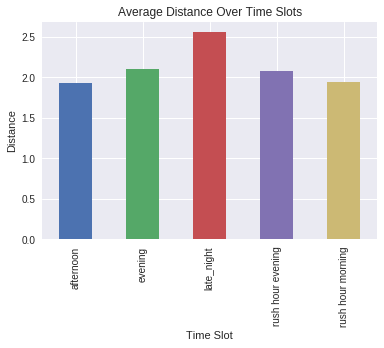

In [79]:
%matplotlib inline
graph = df.groupby('time_of_day')["distance"].mean()
plot1=graph.plot(kind='bar')
plot1.set_xlabel("Time Slot")
plot1.set_ylabel("Distance")
plot1.set_title("Average Distance Over Time Slots")


#Show how the trip duration varies as time of the day changes

In [0]:
#Similar usage of matplotlib to show average trip duration over time slots.

Text(0.5, 1.0, 'Average Trip Duration Over Time Slots')

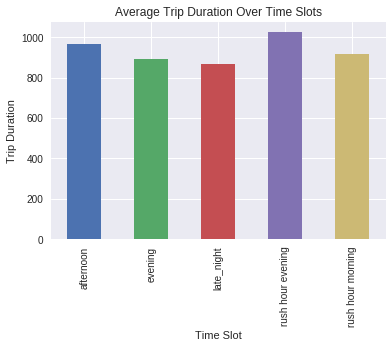

In [83]:
%matplotlib inline
graph=df.groupby('time_of_day')["trip_duration"].mean()
plot2=graph.plot(kind='bar')
plot2.set_xlabel("Time Slot")
plot2.set_ylabel("Trip Duration")
plot2.set_title("Average Trip Duration Over Time Slots")

# Hypothesis Testing
#1. Does passenger group size affect the distance?

In [0]:
#In order to evalute null hypothesis te data data frame divided into 2 sample in each cases. First I divided the dataframe less than 3 passanger and the rest. The corresponding p-value is greater than 0.05 (approximately 10 times), so it can be said that in this test null hypothesis can not be rejected. Also the statistic value shows that (since it is negative) sample1(1 or 2 passengers) has lower average of distance compared to sample2 but the difference is not significant (since the value is small).

In [69]:
from scipy import stats

sample1 = df[df['passenger_count']<3]['distance']
sample2 = df[df['passenger_count']>=3]['distance']
stats.ttest_ind(sample1,sample2,equal_var=False)

Ttest_indResult(statistic=-0.6178759383151726, pvalue=0.5366631280535377)

In [0]:
#2nd case single and multiple passenger sizes are compared. According to corresponding p-value it can be said that null hypothesis can be rejected, so the passenger group size effect the distance. Since the statistic value is negative, it can be said that single passenger go shorter distances. 

In [108]:
from scipy import stats
s1 = df[df['passenger_count']<2]['distance']
s2 = df[df['passenger_count']>=2]['distance']
stats.ttest_ind(s1,s2,equal_var=False)

Ttest_indResult(statistic=-4.903706114570909, pvalue=9.428588173228168e-07)

In [0]:
#Graphical representation of the t-test shows that multiple passengers go longer distances (if we look at the x axis values in the fisrt and second graph). Also the third graph shows that in both cases, majority of passanger goes short distance (around 1 to 4 miles) since the density functions of both function has greater probability in shorter ranges.

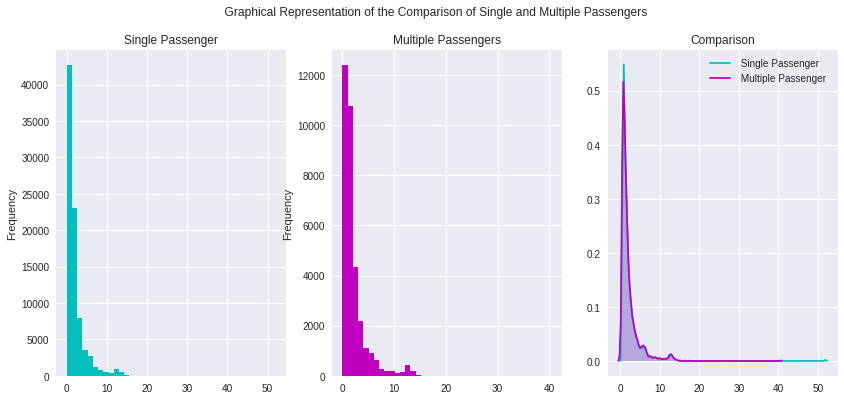

In [116]:
fig, ax = plt.subplots(1, 3, figsize=(14,6)) 
        
s1.plot(kind="hist", ax=ax[0], bins=40, label="completed", color="c")
ax[0].set_title("Single Passenger")

s2.plot(kind="hist", ax=ax[1], bins=40, label="none", color="m")
ax[1].set_title("Multiple Passengers")

sns.kdeplot(sample1, shade=True, label=" Single Passenger ", ax=ax[2], color="c")
sns.kdeplot(sample2, shade=True, label=" Multiple Passenger ", ax=ax[2], color="m")
ax[2].set_title("Comparison")

plt.suptitle(" Graphical Representation of the Comparison of Single and Multiple Passengers")
plt.show()

#2. Do trip distances increase in weekends?

In [0]:
#In order to evaluate the difference between weekdays and weekends, fisrt the day when the trip happened found and added to the dataframe.

In [85]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])
df['weekday_name'] = df['pickup_datetime'].dt.weekday_name
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,coordinates_of_pd,coordinates_of_dd,pickup_district,dropoff_district,distance,time_of_day,weekday_name,time
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,"(40.76793670654297, -73.98215484619139)","(40.765602111816406, -73.96463012695312)",Manhattan,Manhattan,0.933406,2016-03-14 17:24:55,Monday,rush hour evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,"(40.74433898925781, -73.98104858398438)","(40.78998947143555, -73.9729995727539)",Long Island City,Manhattan,3.178194,2016-03-10 21:45:01,Thursday,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,"(40.750526428222656, -73.99456024169923)","(40.7561912536621, -73.97850036621094)",Weehawken,Manhattan,0.928961,2016-03-11 07:11:23,Friday,rush hour morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,"(40.758766174316406, -73.97509002685547)","(40.76506805419922, -73.95320129394531)",Manhattan,Long Island City,1.228003,2016-03-14 14:05:39,Monday,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,"(40.74508666992188, -73.9944839477539)","(40.72270965576172, -73.99899291992188)",New York City,New York City,1.562103,2016-03-14 15:04:38,Monday,afternoon


In [0]:
#After that the dataframe is group according to the week of day column as weekdays and weekends by using isin. The p-value shows that null hypothesis can be rejected since the p-value is way smaller than 0.05 and the day of the week has an effect on the distance of the trip. The statistic value indicates that, in weekend the trips are tend to be longer since the statistic value is positive and significant.

In [112]:
from scipy import stats
s3 = df[df["weekday_name"].isin(['Saturday','Sunday'])]["distance"]
s4 = df[df["weekday_name"].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]["distance"]
stats.ttest_ind(s3, s4, equal_var=False)

Ttest_indResult(statistic=5.604877366928464, pvalue=2.0924144330710487e-08)

In [0]:
#Graphical representation shows that weekend trips have higher ranges compared to weekdays. Similarly to first hypothesis test question, both samples have higher probabilities in small ranges as it can be seen in the third graph.

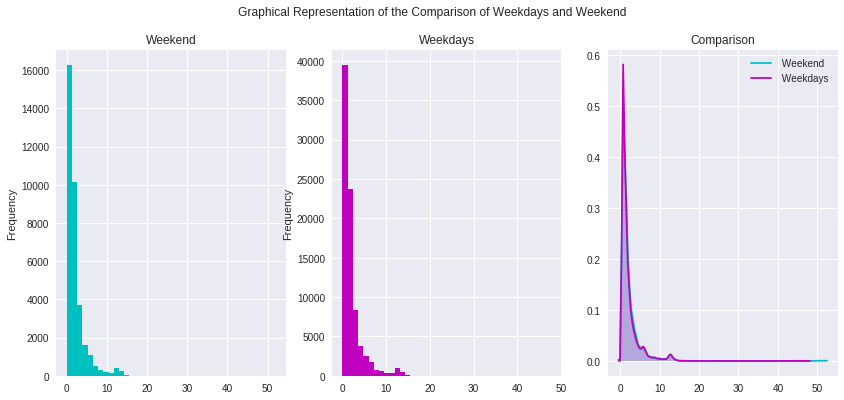

In [117]:
  fig, ax = plt.subplots(1, 3, figsize=(14,6))  
  

  s3.plot(kind="hist", ax=ax[0], bins=40, label="completed", color="c")
  ax[0].set_title("Weekend")

  s4.plot(kind="hist", ax=ax[1], bins=40, label="none", color="m")
  ax[1].set_title("Weekdays")

  sns.kdeplot(s3, shade=True, label=" Weekend", ax=ax[2], color="c")
  sns.kdeplot(s4, shade=True, label=" Weekdays", ax=ax[2], color="m")
  ax[2].set_title("Comparison")

  plt.suptitle("Graphical Representation of the Comparison of Weekdays and Weekend ")
  plt.show()